In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# import sklearn.datasets
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from pandas import DataFrame
# from scipy.stats import norm
# from matplotlib.colors import ListedColormap


plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
# !cat finaltablecleaned.csv
# pd.read_table?

In [16]:
# Step 1. Load the file into a pandas dataframe
CleanTab = pd.read_table('finaltablecleaned_2.csv', sep=',',index_col='Ser No.')
CleanTab

C        Al         Cu         Fe         Mn         Ni         Ti  \
Ser No.                                                                        
1       NaN  0.000100  11.111100  11.111100  11.111100  11.111100  11.111100   
2       NaN  1.250000  10.972222  10.972222  10.972222  10.972222  10.972222   
3       NaN  2.500000  10.833333  10.833333  10.833333  10.833333  10.833333   
4       NaN  3.750000  10.694444  10.694444  10.694444  10.694444  10.694444   
5       NaN  5.000000  10.555556  10.555556  10.555556  10.555556  10.555556   
...      ..       ...        ...        ...        ...        ...        ...   
1659    NaN  5.097666  14.125913   2.511542        NaN  13.382169  54.822876   
1660    NaN  6.117199  11.300731   2.009234        NaN  10.705735  61.099225   
1661    NaN  7.136732   8.475548   1.506925        NaN   8.029301  67.375574   
1662    NaN  8.156265   5.650365   1.004617        NaN   5.352868  73.651923   
1663    NaN  9.175798   2.825183   0.502308        NaN   2.676434  79.928272   

                 V         Cr         Mo         Nb  Zr  Liquidus  Term. Temp  \
Ser No.                                                                         
1        11.111100  11.111100  11.111100  11.111100 NaN   1616.61      827.40   
2        10.972222  10.972222  10.972222  10.972222 NaN   1613.62      827.38   
3        10.833333  10.833333  10.833333  10.833333 NaN   1610.22      828.66   
4        10.694444  10.694444  10.694444  10.694444 NaN   1606.43      816.06   
5        10.555556  10.555556  10.555556  10.555556 NaN   1602.27      793.04   
...            ...        ...        ...        ...  ..       ...         ...   
1659     10.059834        NaN        NaN        NaN NaN   1108.55      913.68   
1660      8.767876        NaN        NaN        NaN NaN   1234.98      910.99   
1661      7.475919        NaN        NaN        NaN NaN   1364.15      907.48   
1662      6.183962        NaN        NaN        NaN NaN   1483.74      920.23   
1663      4.892005        NaN        NaN        NaN NaN   1590.24     1062.11   

         Solidifcation Range  Tot Vol Frac BCC  Tot Vol Frac FCC  \
Ser No.                                                            
1                     789.21          0.541739          0.161854   
2                     786.24          0.598617          0.140155   
3                     781.56          0.684441          0.152523   
4                     790.37          0.713814          0.133392   
5                     809.23          0.727180          0.116059   
...                      ...               ...               ...   
1659                  194.87          0.934646          0.000000   
1660                  323.99          0.955976          0.000000   
1661                  456.67          0.976199          0.000000   
1662                  563.51          0.989393          0.000000   
1663                  528.13          0.990080          0.000000   

         Tot Vol Frac BCC+FCC  Tot Vol Frac Other  Acceptable  
Ser No.                                                        
1                    0.703593            0.296407           0  
2                    0.738772            0.261228           0  
3                    0.836964            0.163036           0  
4                    0.847206            0.152794           0  
5                    0.843239            0.156761           0  
...                       ...                 ...         ...  
1659                 0.934646            0.065354           0  
1660                 0.955976            0.044024           1  
1661                 0.976199            0.023801           1  
1662                 0.989393            0.010607           1  
1663                 0.990080            0.009920           1  

[1653 rows x 20 columns]

In [17]:
CleanTab_rounded = CleanTab.round(2)
CleanTab_rounded

C    Al     Cu     Fe     Mn     Ni     Ti      V     Cr     Mo  \
Ser No.                                                                     
1       NaN  0.00  11.11  11.11  11.11  11.11  11.11  11.11  11.11  11.11   
2       NaN  1.25  10.97  10.97  10.97  10.97  10.97  10.97  10.97  10.97   
3       NaN  2.50  10.83  10.83  10.83  10.83  10.83  10.83  10.83  10.83   
4       NaN  3.75  10.69  10.69  10.69  10.69  10.69  10.69  10.69  10.69   
5       NaN  5.00  10.56  10.56  10.56  10.56  10.56  10.56  10.56  10.56   
...      ..   ...    ...    ...    ...    ...    ...    ...    ...    ...   
1659    NaN  5.10  14.13   2.51    NaN  13.38  54.82  10.06    NaN    NaN   
1660    NaN  6.12  11.30   2.01    NaN  10.71  61.10   8.77    NaN    NaN   
1661    NaN  7.14   8.48   1.51    NaN   8.03  67.38   7.48    NaN    NaN   
1662    NaN  8.16   5.65   1.00    NaN   5.35  73.65   6.18    NaN    NaN   
1663    NaN  9.18   2.83   0.50    NaN   2.68  79.93   4.89    NaN    NaN   

            Nb  Zr  Liquidus  Term. Temp  Solidifcation Range  \
Ser No.                                                         
1        11.11 NaN   1616.61      827.40               789.21   
2        10.97 NaN   1613.62      827.38               786.24   
3        10.83 NaN   1610.22      828.66               781.56   
4        10.69 NaN   1606.43      816.06               790.37   
5        10.56 NaN   1602.27      793.04               809.23   
...        ...  ..       ...         ...                  ...   
1659       NaN NaN   1108.55      913.68               194.87   
1660       NaN NaN   1234.98      910.99               323.99   
1661       NaN NaN   1364.15      907.48               456.67   
1662       NaN NaN   1483.74      920.23               563.51   
1663       NaN NaN   1590.24     1062.11               528.13   

         Tot Vol Frac BCC  Tot Vol Frac FCC  Tot Vol Frac BCC+FCC  \
Ser No.                                                             
1                    0.54              0.16                  0.70   
2                    0.60              0.14                  0.74   
3                    0.68              0.15                  0.84   
4                    0.71              0.13                  0.85   
5                    0.73              0.12                  0.84   
...                   ...               ...                   ...   
1659                 0.93              0.00                  0.93   
1660                 0.96              0.00                  0.96   
1661                 0.98              0.00                  0.98   
1662                 0.99              0.00                  0.99   
1663                 0.99              0.00                  0.99   

         Tot Vol Frac Other  Acceptable  
Ser No.                                  
1                      0.30           0  
2                      0.26           0  
3                      0.16           0  
4                      0.15           0  
5                      0.16           0  
...                     ...         ...  
1659                   0.07           0  
1660                   0.04           1  
1661                   0.02           1  
1662                   0.01           1  
1663                   0.01           1  

[1653 rows x 20 columns]

In [18]:
CleanTab_rounded.describe()

C          Al           Cu           Fe          Mn  \
count  171.000000  872.000000  1053.000000  1598.000000  849.000000   
mean     0.114444    7.193165     9.517825    14.434618   11.908386   
std      0.059637    5.021444     8.442169    14.301068    9.003004   
min      0.020000    0.000000     0.000000     0.000000    0.000000   
25%      0.070000    5.075000     4.010000     4.310000    6.530000   
50%      0.110000    7.140000     7.360000     9.000000    9.170000   
75%      0.160000    9.030000    10.420000    22.000000   14.350000   
max      0.210000   45.000000    50.000000    64.260000   50.000000   

                Ni           Ti            V          Cr           Mo  \
count  1653.000000  1653.000000  1004.000000  893.000000  1030.000000   
mean     13.898657    32.637623     7.024861   10.311624    11.287583   
std       9.523576    22.551020     6.417331    5.939712     7.661165   
min       0.000000     0.000000     0.000000    0.000000     0.000000   
25%       6.980000     9.860000     2.160000    6.940000     6.390000   
50%      11.000000    32.000000     6.390000    9.000000     9.170000   
75%      19.840000    48.610000     9.720000   12.000000    14.235000   
max      50.000000    82.130000    50.000000   50.000000    50.000000   

                Nb         Zr     Liquidus   Term. Temp  Solidifcation Range  \
count  1030.000000  54.000000  1648.000000  1648.000000          1648.000000   
mean     10.082553  11.333333  1565.160789   905.254727           659.906056   
std       6.785771   6.021659   322.300228   127.545406           349.091784   
min       0.000000   2.000000   873.870000   672.340000            34.290000   
25%       6.110000   6.225000  1349.770000   794.340000           345.857500   
50%       8.610000  11.500000  1505.610000   898.865000           633.145000   
75%      11.520000  16.075000  1752.170000   989.185000           932.002500   
max      50.000000  22.500000  2400.970000  1517.350000          1558.390000   

       Tot Vol Frac BCC  Tot Vol Frac FCC  Tot Vol Frac BCC+FCC  \
count       1653.000000       1653.000000           1653.000000   
mean           0.591385          0.132650              0.724077   
std            0.321864          0.258524              0.262621   
min            0.000000          0.000000              0.000000   
25%            0.330000          0.000000              0.570000   
50%            0.630000          0.000000              0.820000   
75%            0.900000          0.090000              0.950000   
max            1.000000          1.000000              1.000000   

       Tot Vol Frac Other   Acceptable  
count         1653.000000  1653.000000  
mean             0.275923     0.244404  
std              0.262621     0.429863  
min              0.000000     0.000000  
25%              0.050000     0.000000  
50%              0.180000     0.000000  
75%              0.430000     0.000000  
max              1.000000     1.000000

In [19]:
CleanTab.columns

Index(['C', 'Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb', 'Zr',
       'Liquidus', 'Term. Temp', 'Solidifcation Range', 'Tot Vol Frac BCC',
       'Tot Vol Frac FCC', 'Tot Vol Frac BCC+FCC', 'Tot Vol Frac Other',
       'Acceptable'],
      dtype='object')

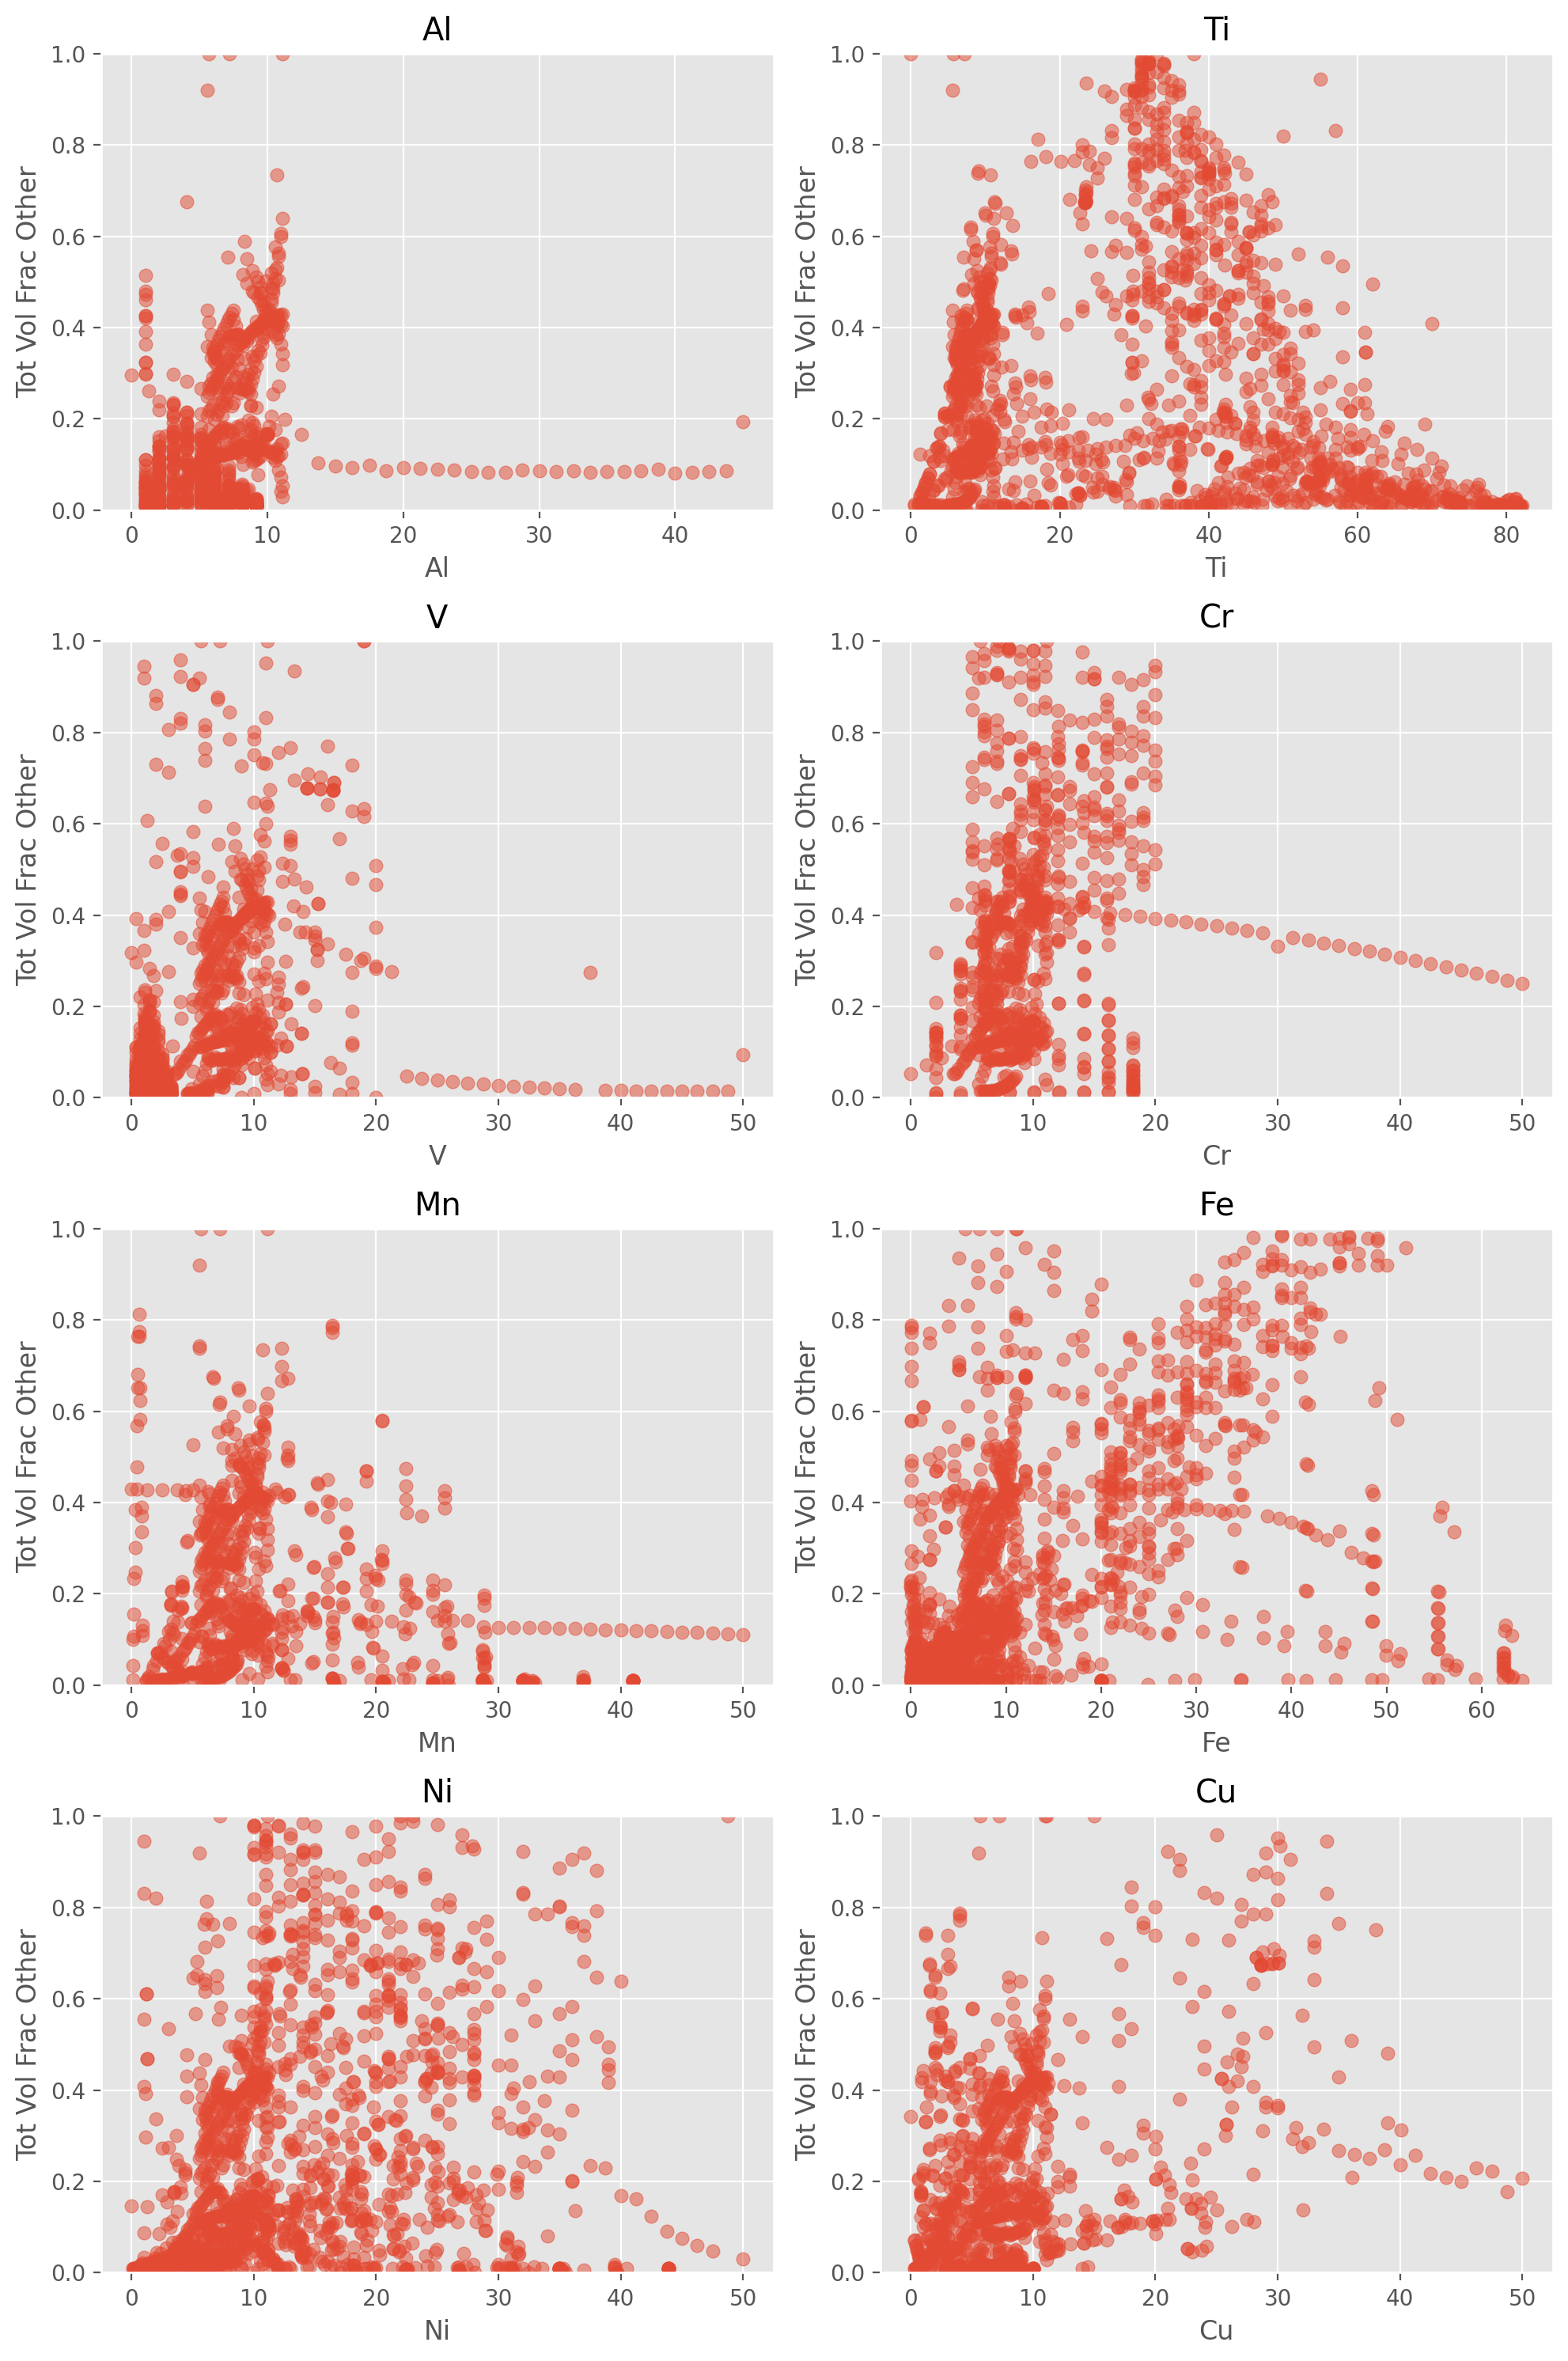

In [20]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac Other']
ylabel = 'Tot Vol Frac Other'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


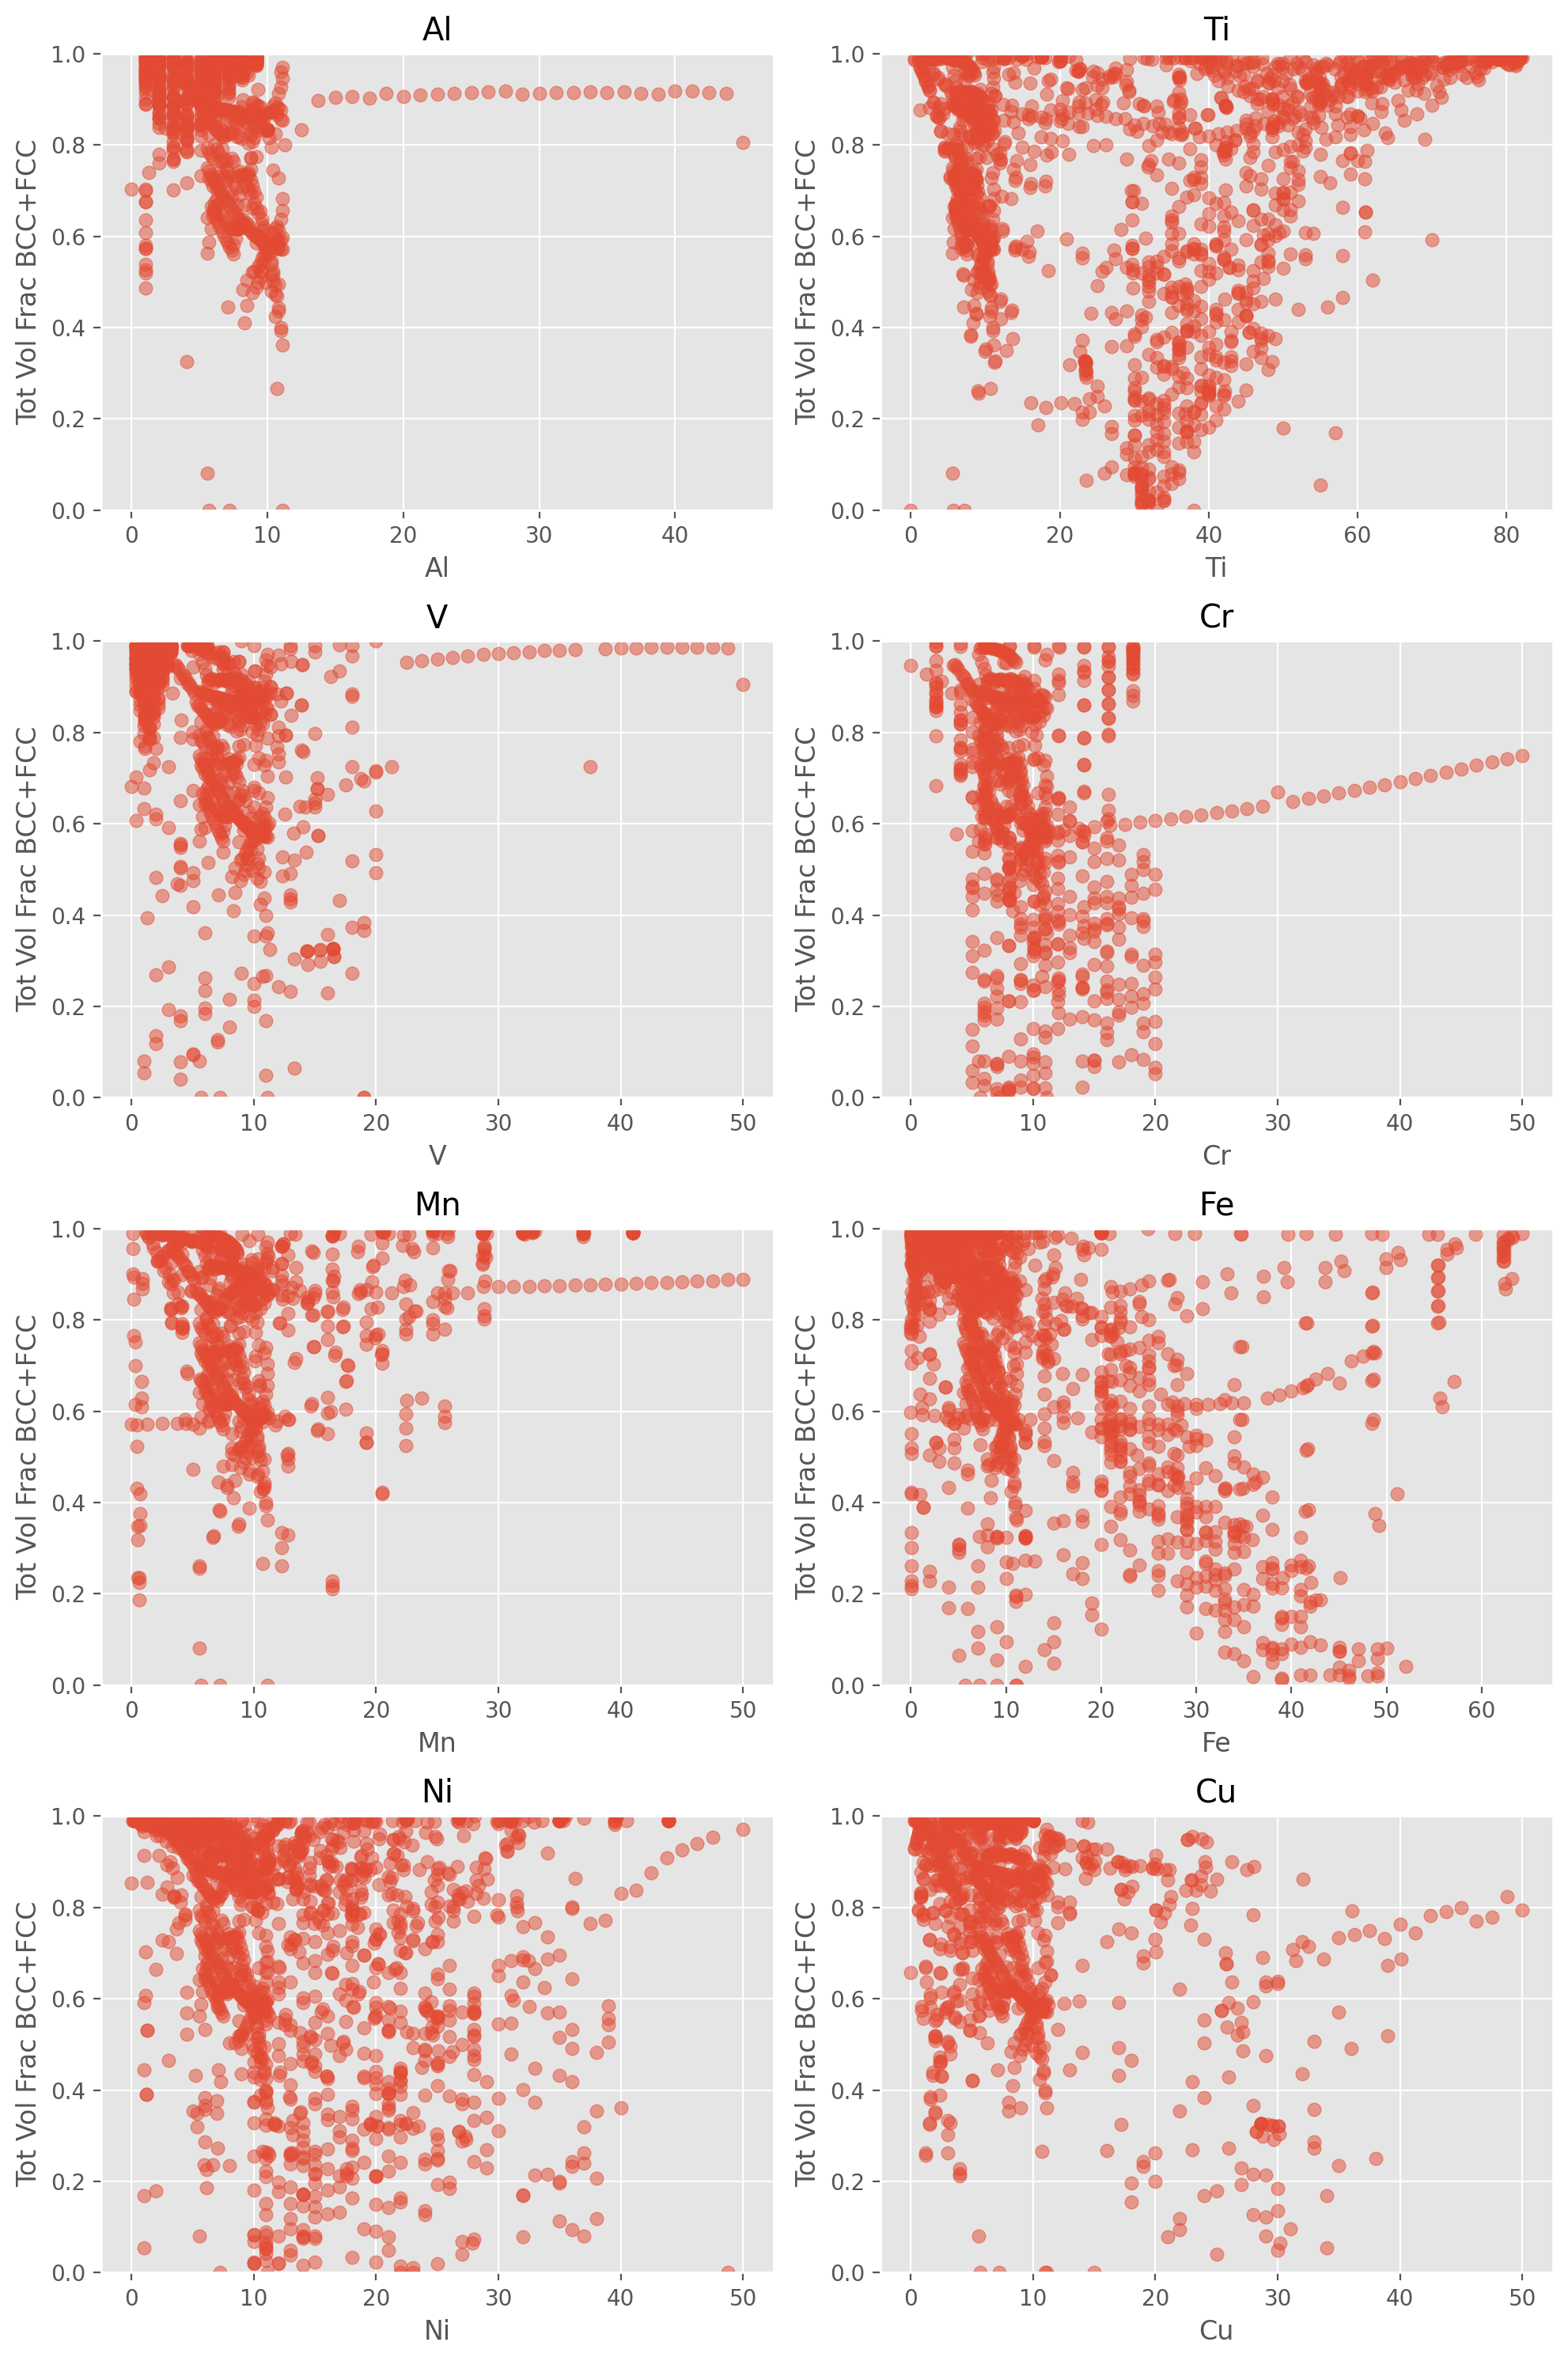

In [21]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac BCC+FCC']
ylabel = 'Tot Vol Frac BCC+FCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


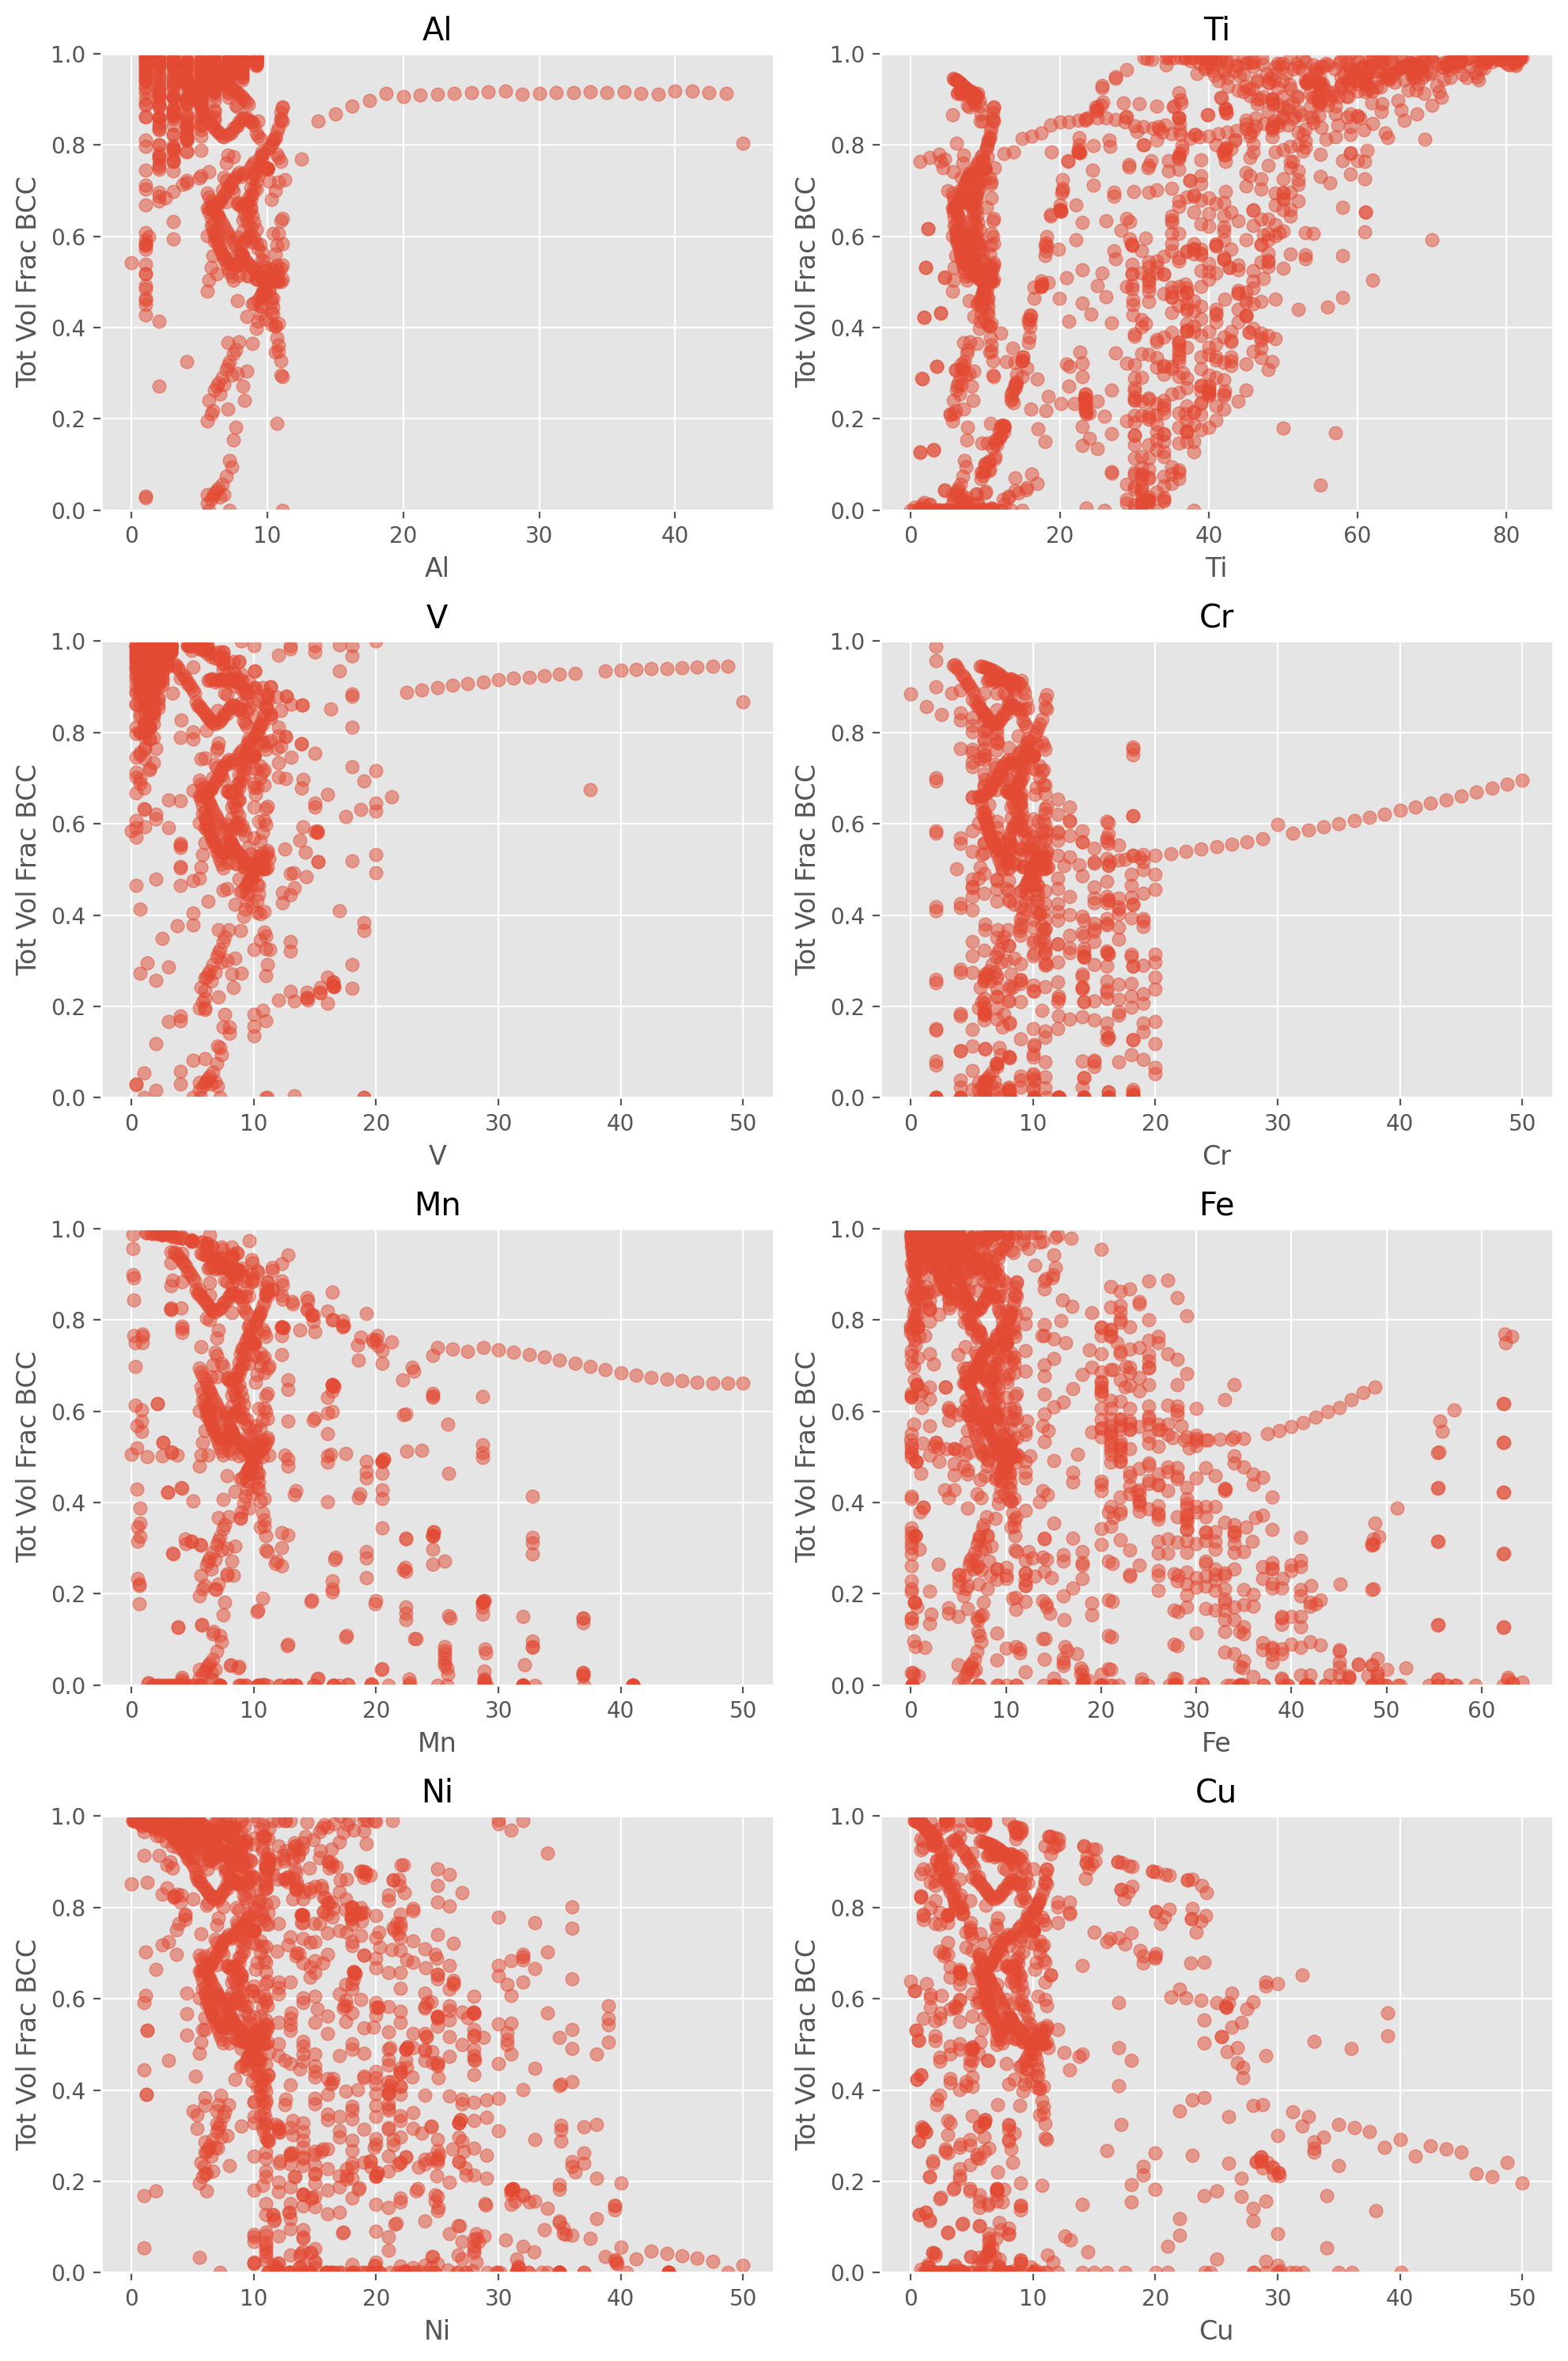

In [22]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac BCC']
ylabel = 'Tot Vol Frac BCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


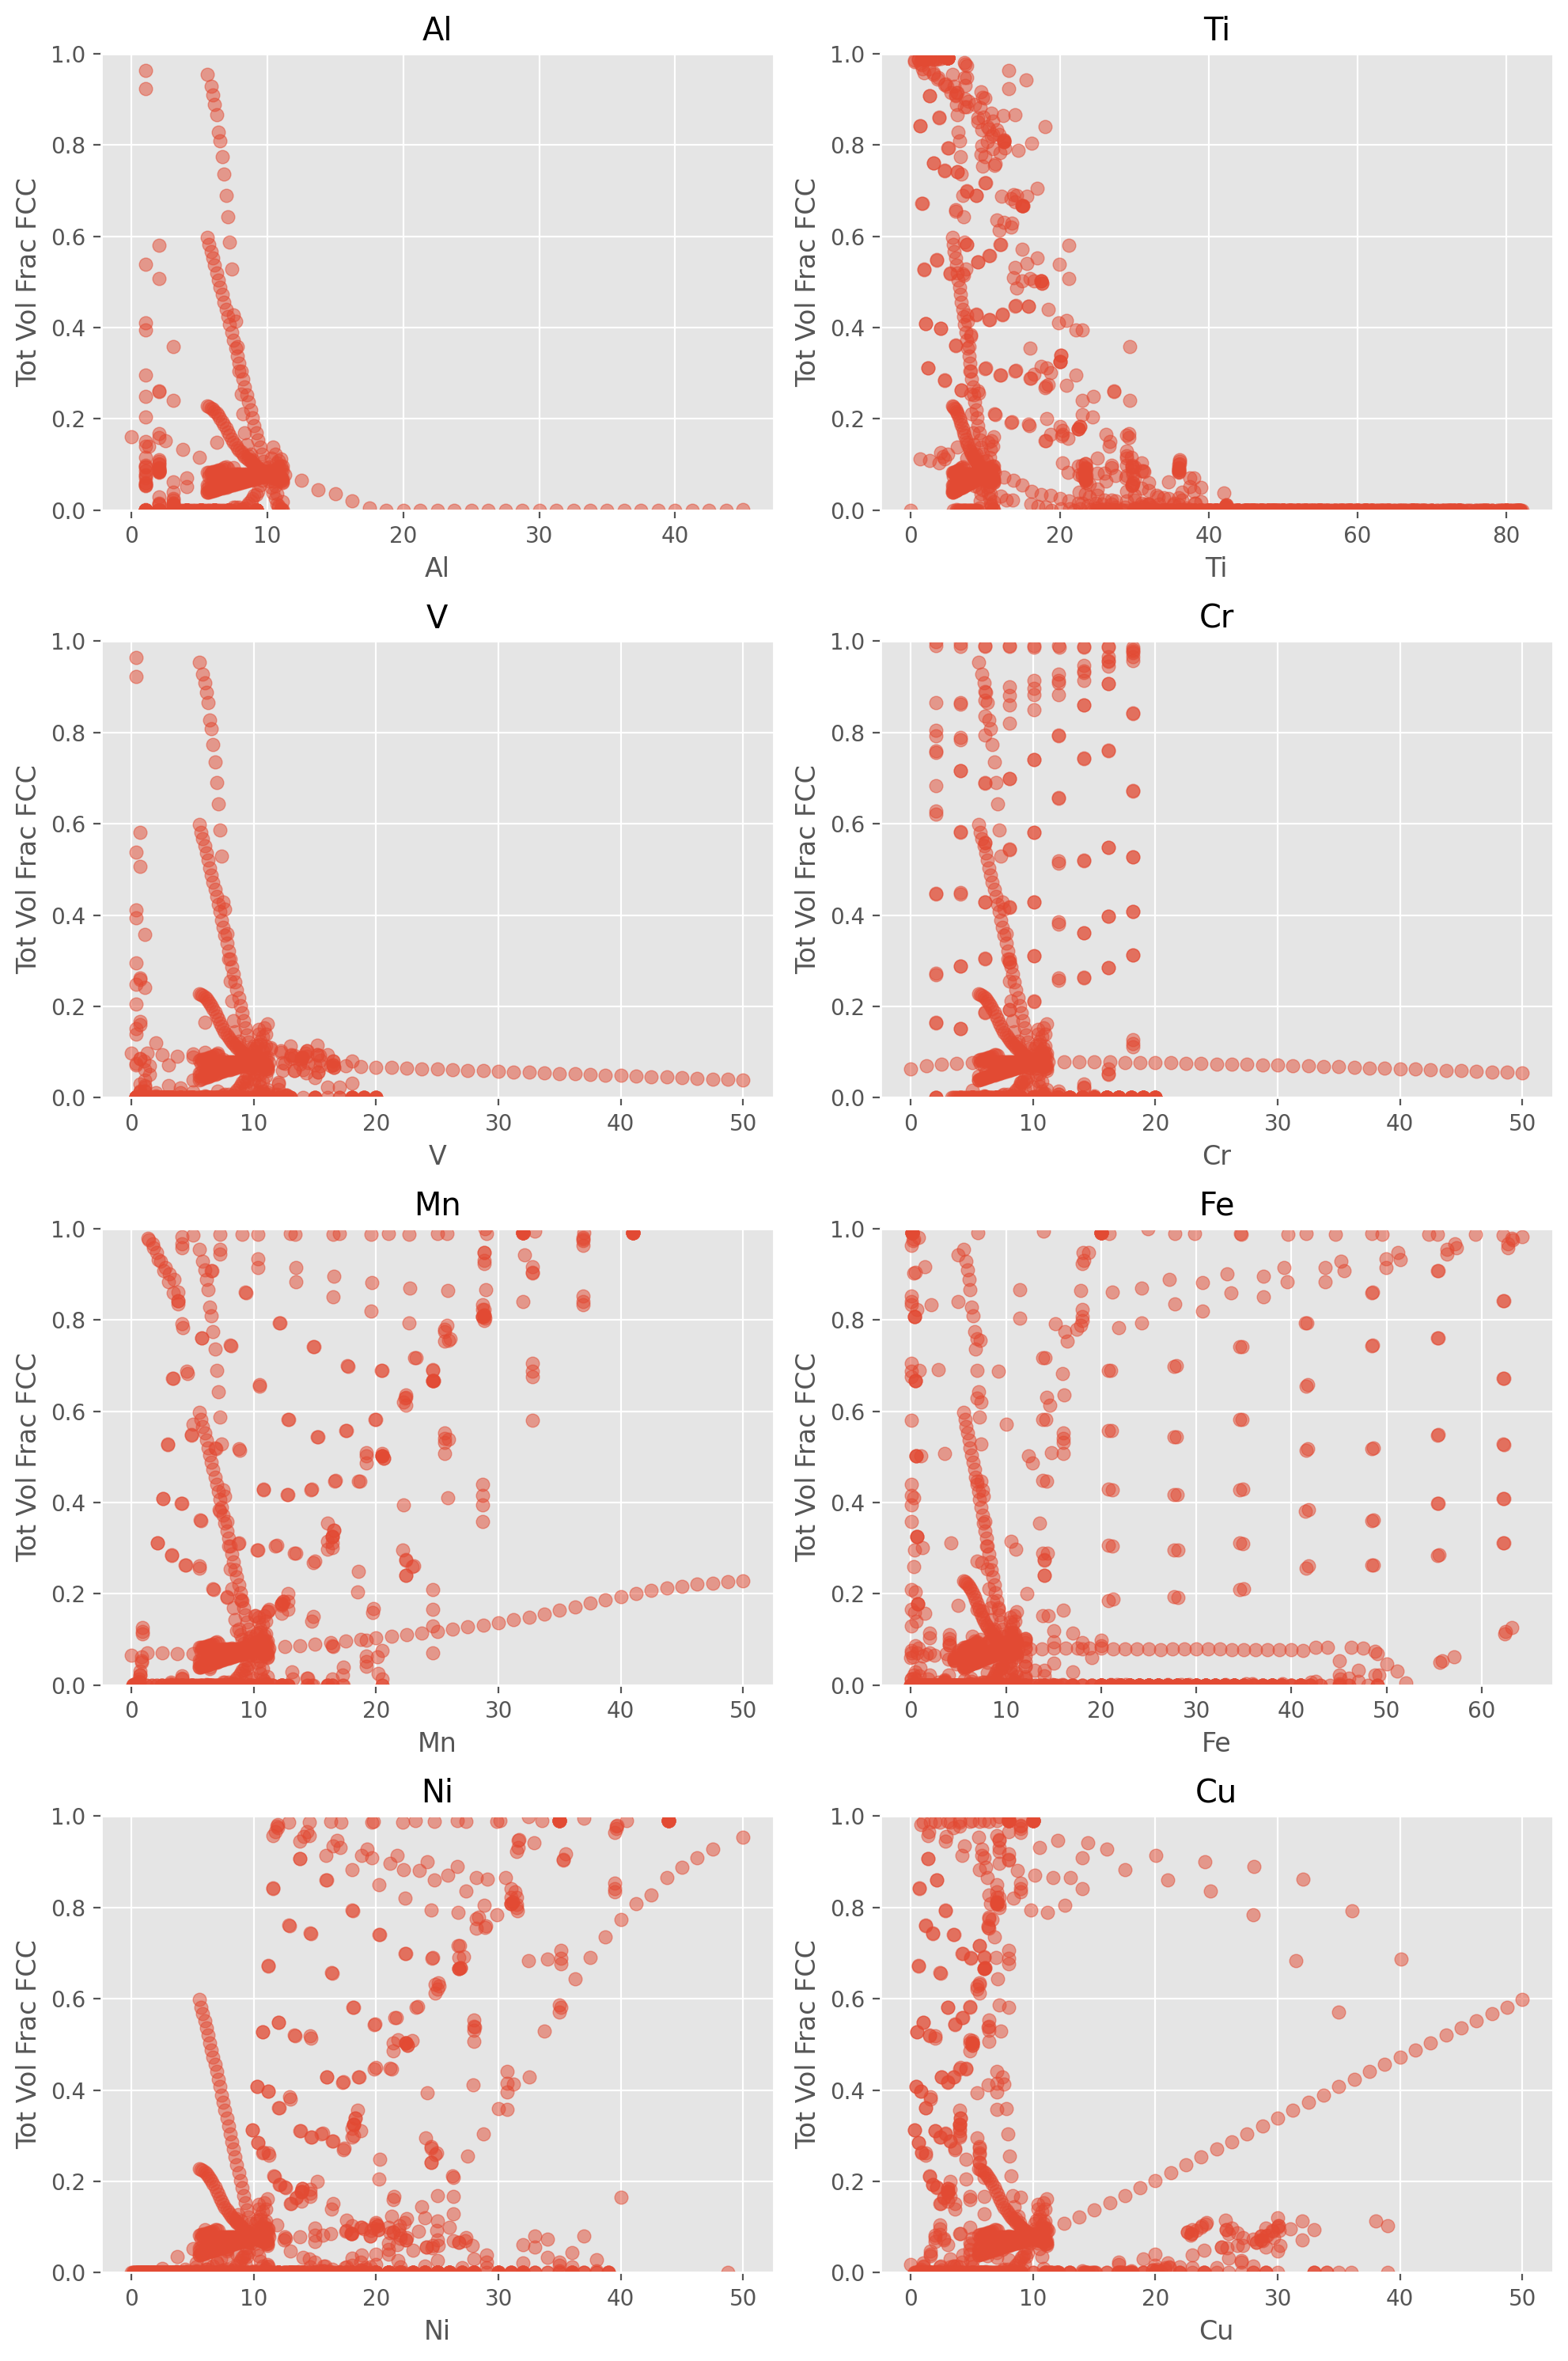

In [23]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac FCC']
ylabel = 'Tot Vol Frac FCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()
